### Data Preparation

In [3]:
import pandas as pd
import numpy as np

# Load datasets
customers = pd.read_csv("../datasets/Customers.csv")
transactions = pd.read_csv("../datasets/Transactions.csv")

# Merge datasets
merged_data = pd.merge(customers, transactions, on="CustomerID", how="inner")

# Feature engineering: Aggregate transaction data
customer_features = merged_data.groupby("CustomerID").agg({
    "TotalValue": "sum",       # Total spending
    "TransactionID": "count",  # Transaction frequency
    "Price": "mean"            # Average price per transaction
}).reset_index()

# Rename columns
customer_features.rename(columns={
    "TotalValue": "total_spending",
    "TransactionID": "transaction_count",
    "Price": "average_price"
}, inplace=True)

# Merge customer profile information
customer_features = pd.merge(customer_features, customers[["CustomerID", "Region"]], on="CustomerID", how="left")

# One-hot encode categorical variables (e.g., Region)
customer_features = pd.get_dummies(customer_features, columns=["Region"], drop_first=True)


#### Clustering

In [4]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import davies_bouldin_score

# Standardize features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(customer_features.drop(columns=["CustomerID"]))

# Apply KMeans clustering
kmeans = KMeans(n_clusters=5, random_state=42)  # Example: 5 clusters
clusters = kmeans.fit_predict(scaled_features)

# Add cluster labels to the dataset
customer_features["Cluster"] = clusters

# Calculate Davies-Bouldin Index
db_index = davies_bouldin_score(scaled_features, clusters)
print(f"Davies-Bouldin Index: {db_index:.4f}")


C:\Users\Medha Agarwal\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Davies-Bouldin Index: 1.1169


#### Visualization

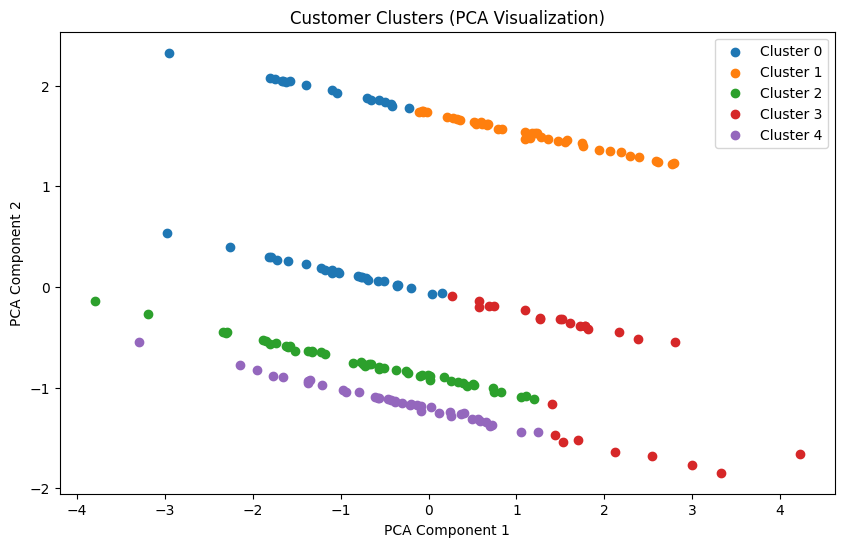

In [5]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reduce dimensionality for visualization
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(scaled_features)

# Plot clusters
plt.figure(figsize=(10, 6))
for cluster in np.unique(clusters):
    cluster_points = reduced_features[clusters == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f"Cluster {cluster}")
plt.title("Customer Clusters (PCA Visualization)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.show()
